<a href="https://colab.research.google.com/github/skyshine460/Datascience_notebook/blob/main/submit_moving41.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
# 初期設定
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df_train = pd.read_csv("/content/drive/MyDrive/SOTA Challenge(アップル 引越し需要予測)/train.csv")
df_lightgbm5 = pd.read_csv("/content/drive/MyDrive/SOTA Challenge(アップル 引越し需要予測)/submit_moving5.csv", header=None)
df_prophet6 = pd.read_csv("/content/drive/MyDrive/SOTA Challenge(アップル 引越し需要予測)/submit_moving6.csv", header=None)
df_prophet9 = pd.read_csv("/content/drive/MyDrive/SOTA Challenge(アップル 引越し需要予測)/submit_moving9.csv", header=None)
df_prophet13 = pd.read_csv("/content/drive/MyDrive/SOTA Challenge(アップル 引越し需要予測)/submit_moving13.csv", header=None)
df_prophet17 = pd.read_csv("/content/drive/MyDrive/SOTA Challenge(アップル 引越し需要予測)/submit_moving17.csv", header=None)
df_prophet20 = pd.read_csv("/content/drive/MyDrive/SOTA Challenge(アップル 引越し需要予測)/submit_moving20.csv", header=None)
df_prophet21 = pd.read_csv("/content/drive/MyDrive/SOTA Challenge(アップル 引越し需要予測)/submit_moving21.csv", header=None)
df_lightgbm25 = pd.read_csv("/content/drive/MyDrive/SOTA Challenge(アップル 引越し需要予測)/submit_moving25_lgb.csv", header=None)
df_lightgbm25_2 = pd.read_csv("/content/drive/MyDrive/SOTA Challenge(アップル 引越し需要予測)/submit_moving25_lgb2.csv", header=None)
df_lightgbm27 = pd.read_csv("/content/drive/MyDrive/SOTA Challenge(アップル 引越し需要予測)/submit_moving27_lgb.csv", header=None)
df_lstm35_d2_hub = pd.read_csv("/content/drive/MyDrive/SOTA Challenge(アップル 引越し需要予測)/submit_moving35_dense2_hub.csv", header=None)
df_lstm36 = pd.read_csv("/content/drive/MyDrive/SOTA Challenge(アップル 引越し需要予測)/submit_moving36.csv", header=None)
df_lstm37 = pd.read_csv("/content/drive/MyDrive/SOTA Challenge(アップル 引越し需要予測)/submit_moving37.csv", header=None)
df_lstm30 = pd.read_csv("/content/drive/MyDrive/SOTA Challenge(アップル 引越し需要予測)/submit_moving30.csv", header=None)
df_lstm40 = pd.read_csv("/content/drive/MyDrive/SOTA Challenge(アップル 引越し需要予測)/submit_moving40.csv", header=None)

sample_submit = pd.read_csv("/content/drive/MyDrive/SOTA Challenge(アップル 引越し需要予測)/sample_submit.csv", header=None)

In [18]:
# 2015年度のデータをbaselineとする
df_train_bl = df_train[-366:].reset_index(drop=True)
df_train_bl.head()

,datetime,y,client,close,price_am,price_pm
0,2015-04-01,61,1,0,3,3
1,2015-04-02,60,1,0,2,2
2,2015-04-03,75,1,0,2,1
3,2015-04-04,86,1,0,4,3
4,2015-04-05,69,1,0,2,2


In [19]:
df_lightgbm5.columns = ['datetime', 'y']
df_prophet6.columns = ['datetime', 'y']
df_prophet9.columns = ['datetime', 'y']
df_prophet13.columns = ['datetime', 'y']
df_prophet17.columns = ['datetime', 'y']
df_prophet20.columns = ['datetime', 'y']
df_prophet21.columns = ['datetime', 'y']
df_lightgbm25.columns = ['datetime', 'y']
df_lightgbm25_2.columns = ['datetime', 'y']
df_lightgbm27.columns = ['datetime', 'y']
df_lstm35_d2_hub.columns = ['datetime', 'y']
df_lstm36.columns = ['datetime', 'y']
df_lstm37.columns = ['datetime', 'y']
df_lstm30.columns = ['datetime', 'y']
df_lstm40.columns = ['datetime', 'y']

In [20]:
df_lightgbm25.head()

,datetime,y
0,0,58.079559
1,1,57.688826
2,2,53.585816
3,3,54.865333
4,4,53.417018


In [21]:
df_diff = df_lightgbm5.copy()
df_diff["yhat9"] = df_prophet9["y"]
df_diff["yhat17"] = df_prophet17["y"]
df_diff["yhat20"] = df_prophet20["y"]
df_diff["yhat21"] = df_prophet21["y"]
# df_diff["yhat_diff_9_17"] = df_prophet17["y"] - df_prophet9["y"]
# df_diff["yhat_diff_17_20"] = df_prophet17["y"] - df_prophet20["y"]
# df_diff["yhat_diff_20_21"] = df_prophet20["y"] - df_prophet21["y"]
df_diff["yhat_diff_21_25"] = df_prophet21["y"] - df_lightgbm25_2["y"]
df_diff["yhat_diff_21_36"] = df_prophet21["y"] - df_lstm36["y"]
df_diff["yhat_diff_21_37"] = df_prophet21["y"] - df_lstm37["y"]
df_diff["yhat_diff_21_30"] = df_prophet21["y"] - df_lstm30["y"]
df_diff["yhat_diff_40_30"] = df_lstm40["y"] - df_lstm30["y"]

pd.set_option('display.max_rows', None)
df_diff

,datetime,y,yhat9,yhat17,yhat20,yhat21,yhat_diff_21_25,yhat_diff_21_36,yhat_diff_21_37,yhat_diff_21_30,yhat_diff_40_30
0,2016-04-01,68.228807,82.849854,75.368124,74.504297,74.419706,0.632710,-8.168971,0.208478,-0.113352,4.456306
1,2016-04-02,65.349049,90.433463,73.615278,74.672249,74.733782,2.434039,-6.944181,3.264277,0.975245,7.867371
2,2016-04-03,64.418783,83.721052,72.391210,70.514086,70.482915,-1.195025,-14.705867,-4.407161,-14.134272,-0.676331
3,2016-04-04,64.757358,74.731621,71.811670,70.764126,70.723706,-4.728568,-10.229076,2.385320,-10.951724,-7.205009
4,2016-04-05,55.602259,67.385577,60.752180,60.945798,60.959907,-3.996344,-14.687272,0.314078,-16.343446,-9.027412
5,2016-04-06,51.868016,64.206428,58.677636,57.599336,57.552471,-1.044876,-14.349300,-2.209236,-17.342426,-9.489471
6,2016-04-07,49.928263,62.848485,56.343241,57.675599,57.654407,-1.661383,-13.731381,-3.226739,-17.705456,-10.487549
7,2016-04-08,58.617816,65.912146,64.866650,67.092772,67.093951,-5.424737,-4.835538,-0.544805,-9.908201,-7.911842
8,2016-04-09,59.084288,73.822140,67.251383,69.556095,69.516572,-1.309167,-3.343657,-2.767470,-8.699500,-5.326530
9,2016-04-10,61.713682,67.143169,70.669852,71.582010,71.494546,-1.353475,0.609407,7.500695,0.177697,-7.294670


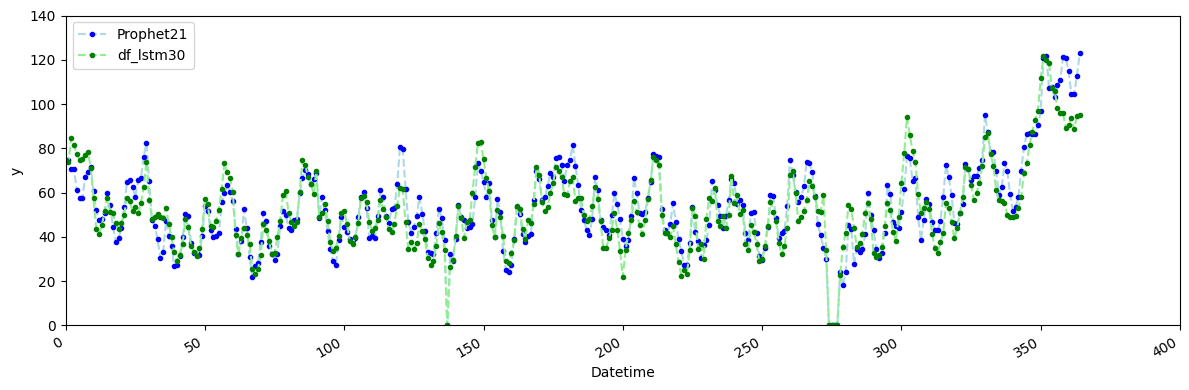

In [22]:
fig, ax = plt.subplots(figsize=(12, 4))

# ax.plot(df_train_bl['y'], ls='--', label='Baseline')
# ax.plot(df_lightgbm5['y'], color='blue', label='LightGBM')
# ax.plot(df_prophet6['y'], color='darkorange', label='Prophet6')
# ax.plot(df_prophet9['y'], ls='--', color='red', label='Prophet9')
# ax.plot(df_prophet13['y'], ls='--', color='blue', label='Prophet13')
# ax.plot(df_prophet17['y'], color='green', label='Prophet17')
# ax.plot(df_prophet20['y'], ls='--', color='lightblue', label='Prophet20')
ax.plot(df_prophet21['y'], ls='--', color='lightblue', label='Prophet21', marker='o', markersize=3, markerfacecolor='blue', markeredgecolor='blue')
ax.plot(df_lstm30['y'], ls='--', color='lightgreen', label='df_lstm30', marker='o', markersize=3, markerfacecolor='green', markeredgecolor='green')
# ax.plot(df_lstm37['y'], ls='--', color='red', label='df_lstm37', marker='o', markersize=3, markerfacecolor='red', markeredgecolor='red')

ax.set_xlabel('Datetime')
ax.set_ylabel('y')

ax.legend(loc='best')
plt.ylim(0, 140)
plt.xlim(0, 400)

fig.autofmt_xdate()
plt.tight_layout()

lightGBMモデルは繁忙期(３月)
のデータを上手く捉えられていないので、割合を変更する


In [23]:
df_diff["ense_21_30"] = np.nan
df_diff["ense_21_30"][:-31] = df_prophet21["y"][:-31]*0.5 + df_lstm30["y"][:-31]*0.5
df_diff["ense_21_30"][-31:] = df_prophet21["y"][-31:]*0.8 + df_lstm30["y"][-31:]*0.2
df_diff["ense_21_30"].head()

<ipython-input-23-40e4cd7b9d58>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_diff["ense_21_30"][:-31] = df_prophet21["y"][:-31]*0.5 + df_lstm30["y"][:-31]*0.5
<ipython-input-23-40e4cd7b9d58>:2: SettingWithCopyWarning: 
A value is tryi

,ense_21_30
0,74.476382
1,74.246160
2,77.550051
3,76.199568
4,69.131629


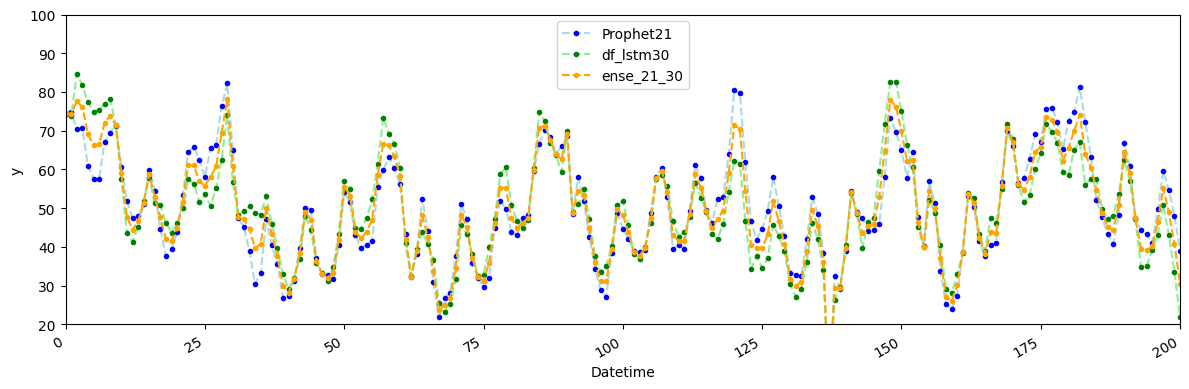

In [24]:
fig, ax = plt.subplots(figsize=(12, 4))


ax.plot(df_prophet21['y'], ls='--', color='lightblue', label='Prophet21', marker='o', markersize=3, markerfacecolor='blue', markeredgecolor='blue')
ax.plot(df_lstm30['y'], ls='--', color='lightgreen', label='df_lstm30', marker='o', markersize=3, markerfacecolor='green', markeredgecolor='green')
ax.plot(df_diff["ense_21_30"], ls='--', color='orange', label='ense_21_30', marker='o', markersize=3, markerfacecolor='orange', markeredgecolor='orange')

ax.set_xlabel('Datetime')
ax.set_ylabel('y')

ax.legend(loc='best')
plt.ylim(20, 100)
plt.xlim(0, 200)

fig.autofmt_xdate()
plt.tight_layout()

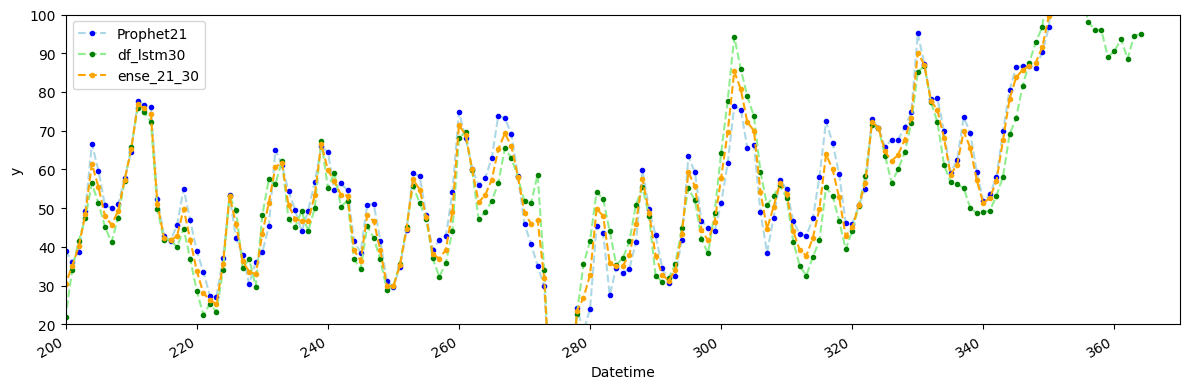

In [25]:
fig, ax = plt.subplots(figsize=(12, 4))


ax.plot(df_prophet21['y'], ls='--', color='lightblue', label='Prophet21', marker='o', markersize=3, markerfacecolor='blue', markeredgecolor='blue')
ax.plot(df_lstm30['y'], ls='--', color='lightgreen', label='df_lstm30', marker='o', markersize=3, markerfacecolor='green', markeredgecolor='green')
ax.plot(df_diff["ense_21_30"], ls='--', color='orange', label='ense_21_30', marker='o', markersize=3, markerfacecolor='orange', markeredgecolor='orange')

ax.set_xlabel('Datetime')
ax.set_ylabel('y')

ax.legend(loc='best')
plt.ylim(20, 100)
plt.xlim(200, 370)

fig.autofmt_xdate()
plt.tight_layout()

In [26]:
df_submit = pd.DataFrame({
    'datetime': sample_submit.iloc[:, 0].reset_index(drop=True),
    'y': df_diff["ense_21_30"].reset_index(drop=True)
})

display(df_submit.head(), df_submit.tail())

,datetime,y
0,2016-04-01,74.476382
1,2016-04-02,74.246160
2,2016-04-03,77.550051
3,2016-04-04,76.199568
4,2016-04-05,69.131629


,datetime,y
360,2017-03-27,109.956040
361,2017-03-28,102.482200
362,2017-03-29,101.478797
363,2017-03-30,108.906819
364,2017-03-31,117.462506


In [27]:
df_submit.to_csv("submit_moving41.csv", index=False, header=False)